# 各個粉絲頁每月po文的comment變化(max, min, mean)

In [1]:
%matplotlib inline
import json;
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from datetime import datetime
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
import seaborn as sb
sb.set_style("whitegrid")
import pyes
es_address='127.0.0.1:9200'
conn = pyes.es.ES(es_address)

圖片繪製

http://chrisalbon.com/python/seaborn_pandas_timeseries_plot.html

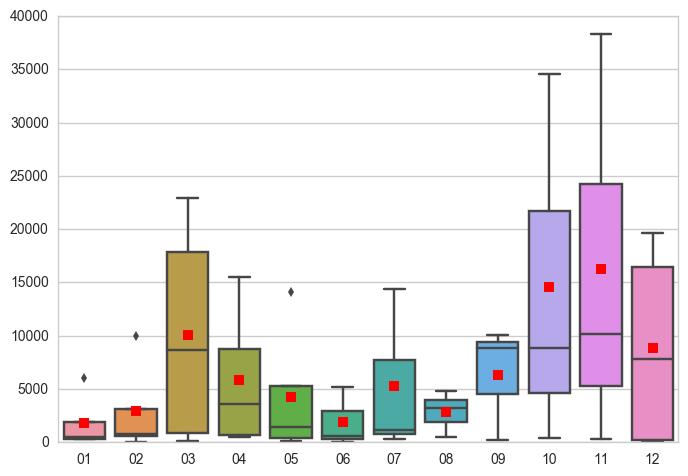

In [11]:
def Posts(fid):
    amount = dict()
    
    q = pyes.query.BoolQuery()
    
    tq = pyes.query.TermQuery(field="fid", value=fid)
    q.add_must(tq)
    
    DHAgg = pyes.aggs.DateHistogramAgg('1month' ,field='created_time', interval='month') 
    
    qsearch = pyes.Search(q)  
    qsearch.agg.add(DHAgg)
    
    rs = conn.search(query=qsearch ,indices='facebook_nested' ,type="comment")
    #print json.dumps(rs.aggs, indent=2)
    encoded = rs.aggs
    for x in range(len(encoded['1month']['buckets'])):
        dt = datetime.strptime(encoded['1month']['buckets'][x]['key_as_string'], '%Y-%m-%dT%H:%M:%S.%fZ')
        dtm = datetime.strftime(dt, '%m')
        
        if dtm in amount:
            amount[dtm].append(encoded['1month']['buckets'][x]['doc_count'])
        else:
            amount[dtm] = [encoded['1month']['buckets'][x]['doc_count']]
        
    df = pd.DataFrame(dict([(k,Series(v)) for k,v in amount.iteritems()])) # 將沒有資料的欄位填上 NaN
    ax = sb.boxplot(df, vert=True, showmeans=True)

Posts(134004310003557)